<a href="https://colab.research.google.com/github/Kistin-git/Crypto_Laba/blob/dev/%22lab_work%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [2]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 155MB/s]


Начнем с необходимых приготовлений.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [4]:
coins = pd.read_csv("coins.csv")

Посмотрим что получилось

In [5]:
coins.set_index('date').head(4000)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08,0.002689,NaN,NaN,NaN,XLM,Stellar,0.002689,0.002785,0.002608,0.002709,19430.0,1.157130e+07
2015-04-08,0.000012,452.0,2.580681e+02,600.0,XVG,Verge,0.000012,0.000013,0.000010,0.000012,301.0,9.572000e+04
2015-04-09,244.750000,116487.0,1.889311e+08,247529.0,BTC,Bitcoin,244.750000,246.120000,239.400000,243.680000,21643500.0,3.434520e+09


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [6]:
num_unique_coins = coins['name'].nunique()
print(f"В датасете содержится {num_unique_coins} различных монет.")

В датасете содержится 70 различных монет.


### 2. За какой период данные мы имеем? (0.4 балла)

In [7]:
min_date = coins['date'].min()
max_date = coins['date'].max()

date_difference = pd.to_datetime(max_date) - pd.to_datetime(min_date)

years = date_difference.days // 365
months = (date_difference.days % 365) // 30
days = (date_difference.days % 365 + years // 4) % 30

print(f"Данные в датасете доступны с {min_date} по {max_date}, то есть за {years} лет, {months} месяц и {days} дней.")


Данные в датасете доступны с 2013-04-28 по 2018-06-06, то есть за 5 лет, 1 месяц и 11 дней.


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [8]:
missing_data = coins.isnull().sum()

print("Пропуски в данных:")
print(missing_data)

missing_data_type = coins.dtypes[coins.isnull().any()]

print("\nПрирода пропусков:")
print(missing_data_type)
print("\nИзучив таблицу фильтрами понимаем,\nчто были проблемы с записью txVolume, txVolume, activeAddresses для монеты Stellar, \nа с записью price были проблемы у монет Bitmark, KingN Coin, VeChain")

Пропуски в данных:
date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Природа пропусков:
price              float64
txCount            float64
txVolume           float64
activeAddresses    float64
dtype: object

Изучив таблицу фильтрами понимаем,
что были проблемы с записью txVolume, txVolume, activeAddresses для монеты Stellar, 
а с записью price были проблемы у монет Bitmark, KingN Coin, VeChain


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [9]:
max_price_index = coins['price'].idxmax()

max_price_coin = coins.loc[max_price_index, 'name']
max_price_date = coins.loc[max_price_index, 'date']
max_price_value = coins.loc[max_price_index, 'price']

print(f"Самая высокая цена ({max_price_value} USD) была у монеты '{max_price_coin}' "
      f"на дату {max_price_date}.")


Самая высокая цена (19475.8 USD) была у монеты 'Bitcoin' на дату 2017-12-17.


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

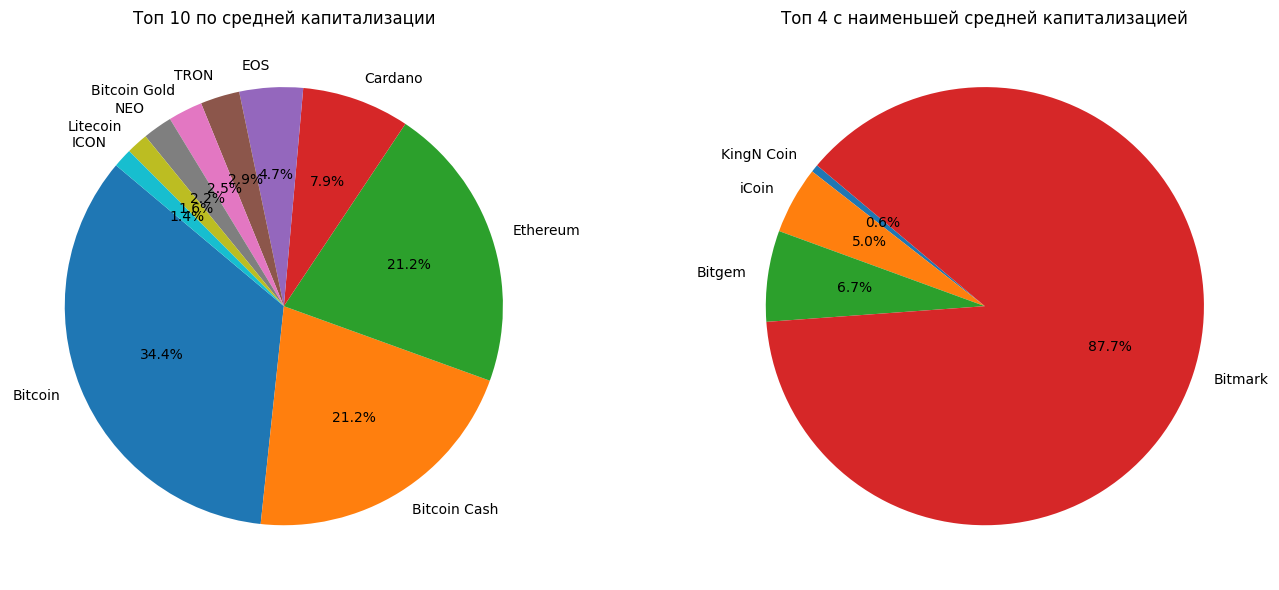

Монета с наибольшей средней капитализацией: Bitcoin
Монета с наименьшей средней капитализацией: KingN Coin


In [10]:
import matplotlib.pyplot as plt

average_market_cap = coins.groupby('name')['market'].mean()

top_10_coins = average_market_cap.nlargest(10)
bottom_4_coins = average_market_cap.nsmallest(4)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(top_10_coins, labels=top_10_coins.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Топ 10 по средней капитализации')

axes[1].pie(bottom_4_coins, labels=bottom_4_coins.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Топ 4 с наименьшей средней капитализацией')

max_market_cap_coin = top_10_coins.idxmax()
min_market_cap_coin = bottom_4_coins.idxmin()

plt.tight_layout()
plt.show()

print(f"Монета с наибольшей средней капитализацией: {max_market_cap_coin}")
print(f"Монета с наименьшей средней капитализацией: {min_market_cap_coin}")


## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [11]:
!pip install mplfinance
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mdates

def plot_fancy_price_action(coins, symbol, start_date, end_date):
    filtered_data = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]

    filtered_data['date'] = pd.to_datetime(filtered_data['date'])
    filtered_data['date'] = mdates.date2num(filtered_data['date'])

    ohlc_data = filtered_data[['date', 'open', 'high', 'low', 'close']]

    fig, ax = plt.subplots(figsize=(12, 6))
    candlestick_ohlc(ax, ohlc_data.values, width=0.6, colorup='g', colordown='r')

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.set_title(f'Ценовая активность для {symbol} с {start_date} по {end_date}')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена')
    plt.xticks(rotation=45)
    ax.grid()
    plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


<ipython-input-11-089ef195a210>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
<ipython-input-11-089ef195a210>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = mdates.date2num(filtered_data['date'])


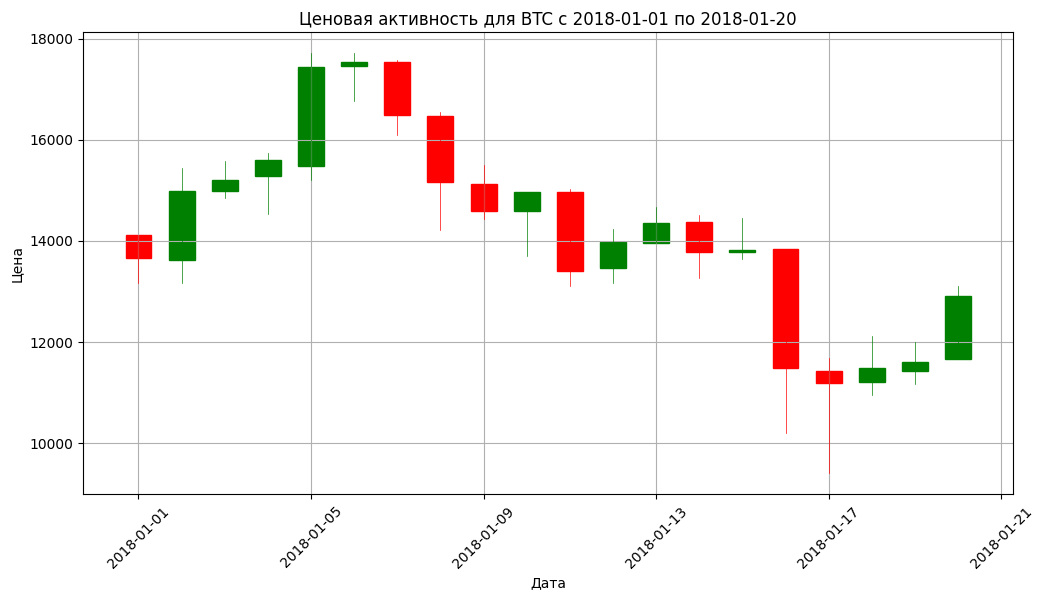


Толстый бар (свеча) отображает диапазон от цены открытия (Open) до цены закрытия (Close) за определенный период времени (например, день, час, минуту).
Если цена закрытия выше цены открытия, то бар обычно рисуется зеленым (или другим подобным цветом), иначе - красным (или другим цветом, обозначающим понижение цены).

Тонкие линии (усики) на концах толстого бара представляют диапазон от минимальной цены (Low) до максимальной цены (High) за тот же самый период времени.


In [12]:
plot_fancy_price_action(coins, 'BTC', '2018-01-01', '2018-01-20')

print("\nТолстый бар (свеча) отображает диапазон от цены открытия (Open) до цены закрытия (Close) за определенный период времени (например, день, час, минуту).\nЕсли цена закрытия выше цены открытия, то бар обычно рисуется зеленым (или другим подобным цветом), иначе - красным (или другим цветом, обозначающим понижение цены).")
print("\nТонкие линии (усики) на концах толстого бара представляют диапазон от минимальной цены (Low) до максимальной цены (High) за тот же самый период времени.")

Посмотрим, что получилось:

<ipython-input-11-089ef195a210>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
<ipython-input-11-089ef195a210>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = mdates.date2num(filtered_data['date'])


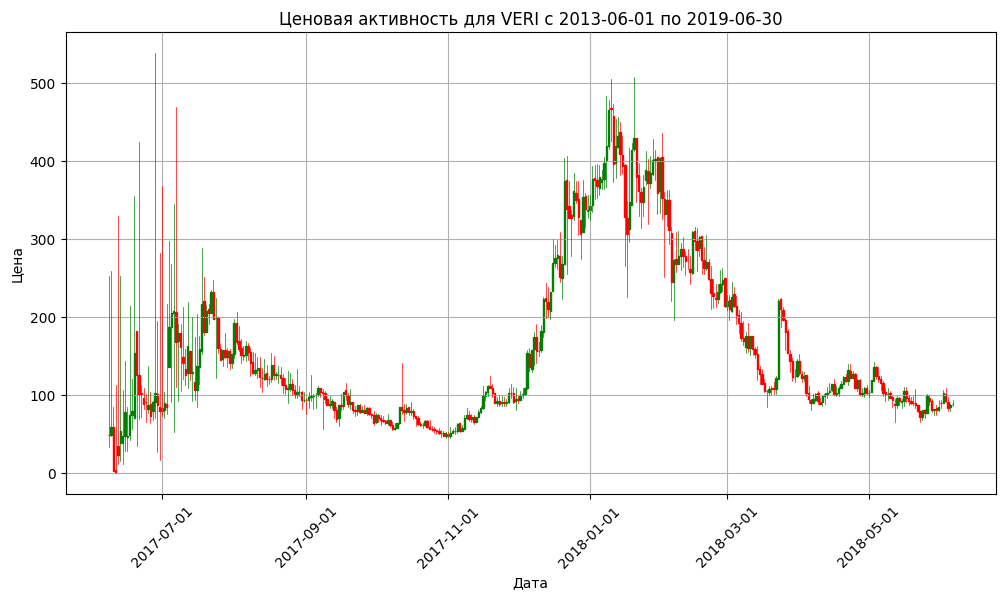

In [13]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [14]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    needed_lines = coins.loc[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    pnd = list(needed_lines['high'] / (needed_lines['open'] + (needed_lines['open'] < needed_lines['close']) *
                                       (needed_lines['close'] - needed_lines['open'])))
    ind_with_max_pnd = int(pnd.index(max(pnd)))
    print('У ', needed_lines.iloc[[ind_with_max_pnd]].name.item(), ' самый большой pnd был ',
          needed_lines.iloc[[ind_with_max_pnd]].date.item(), ', и он был равен ', pnd[ind_with_max_pnd], sep='')

In [15]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

У Bitcoin самый большой pnd был 2017-11-29, и он был равен 1.1428940004366206


Сравните эти значения для разных монет:

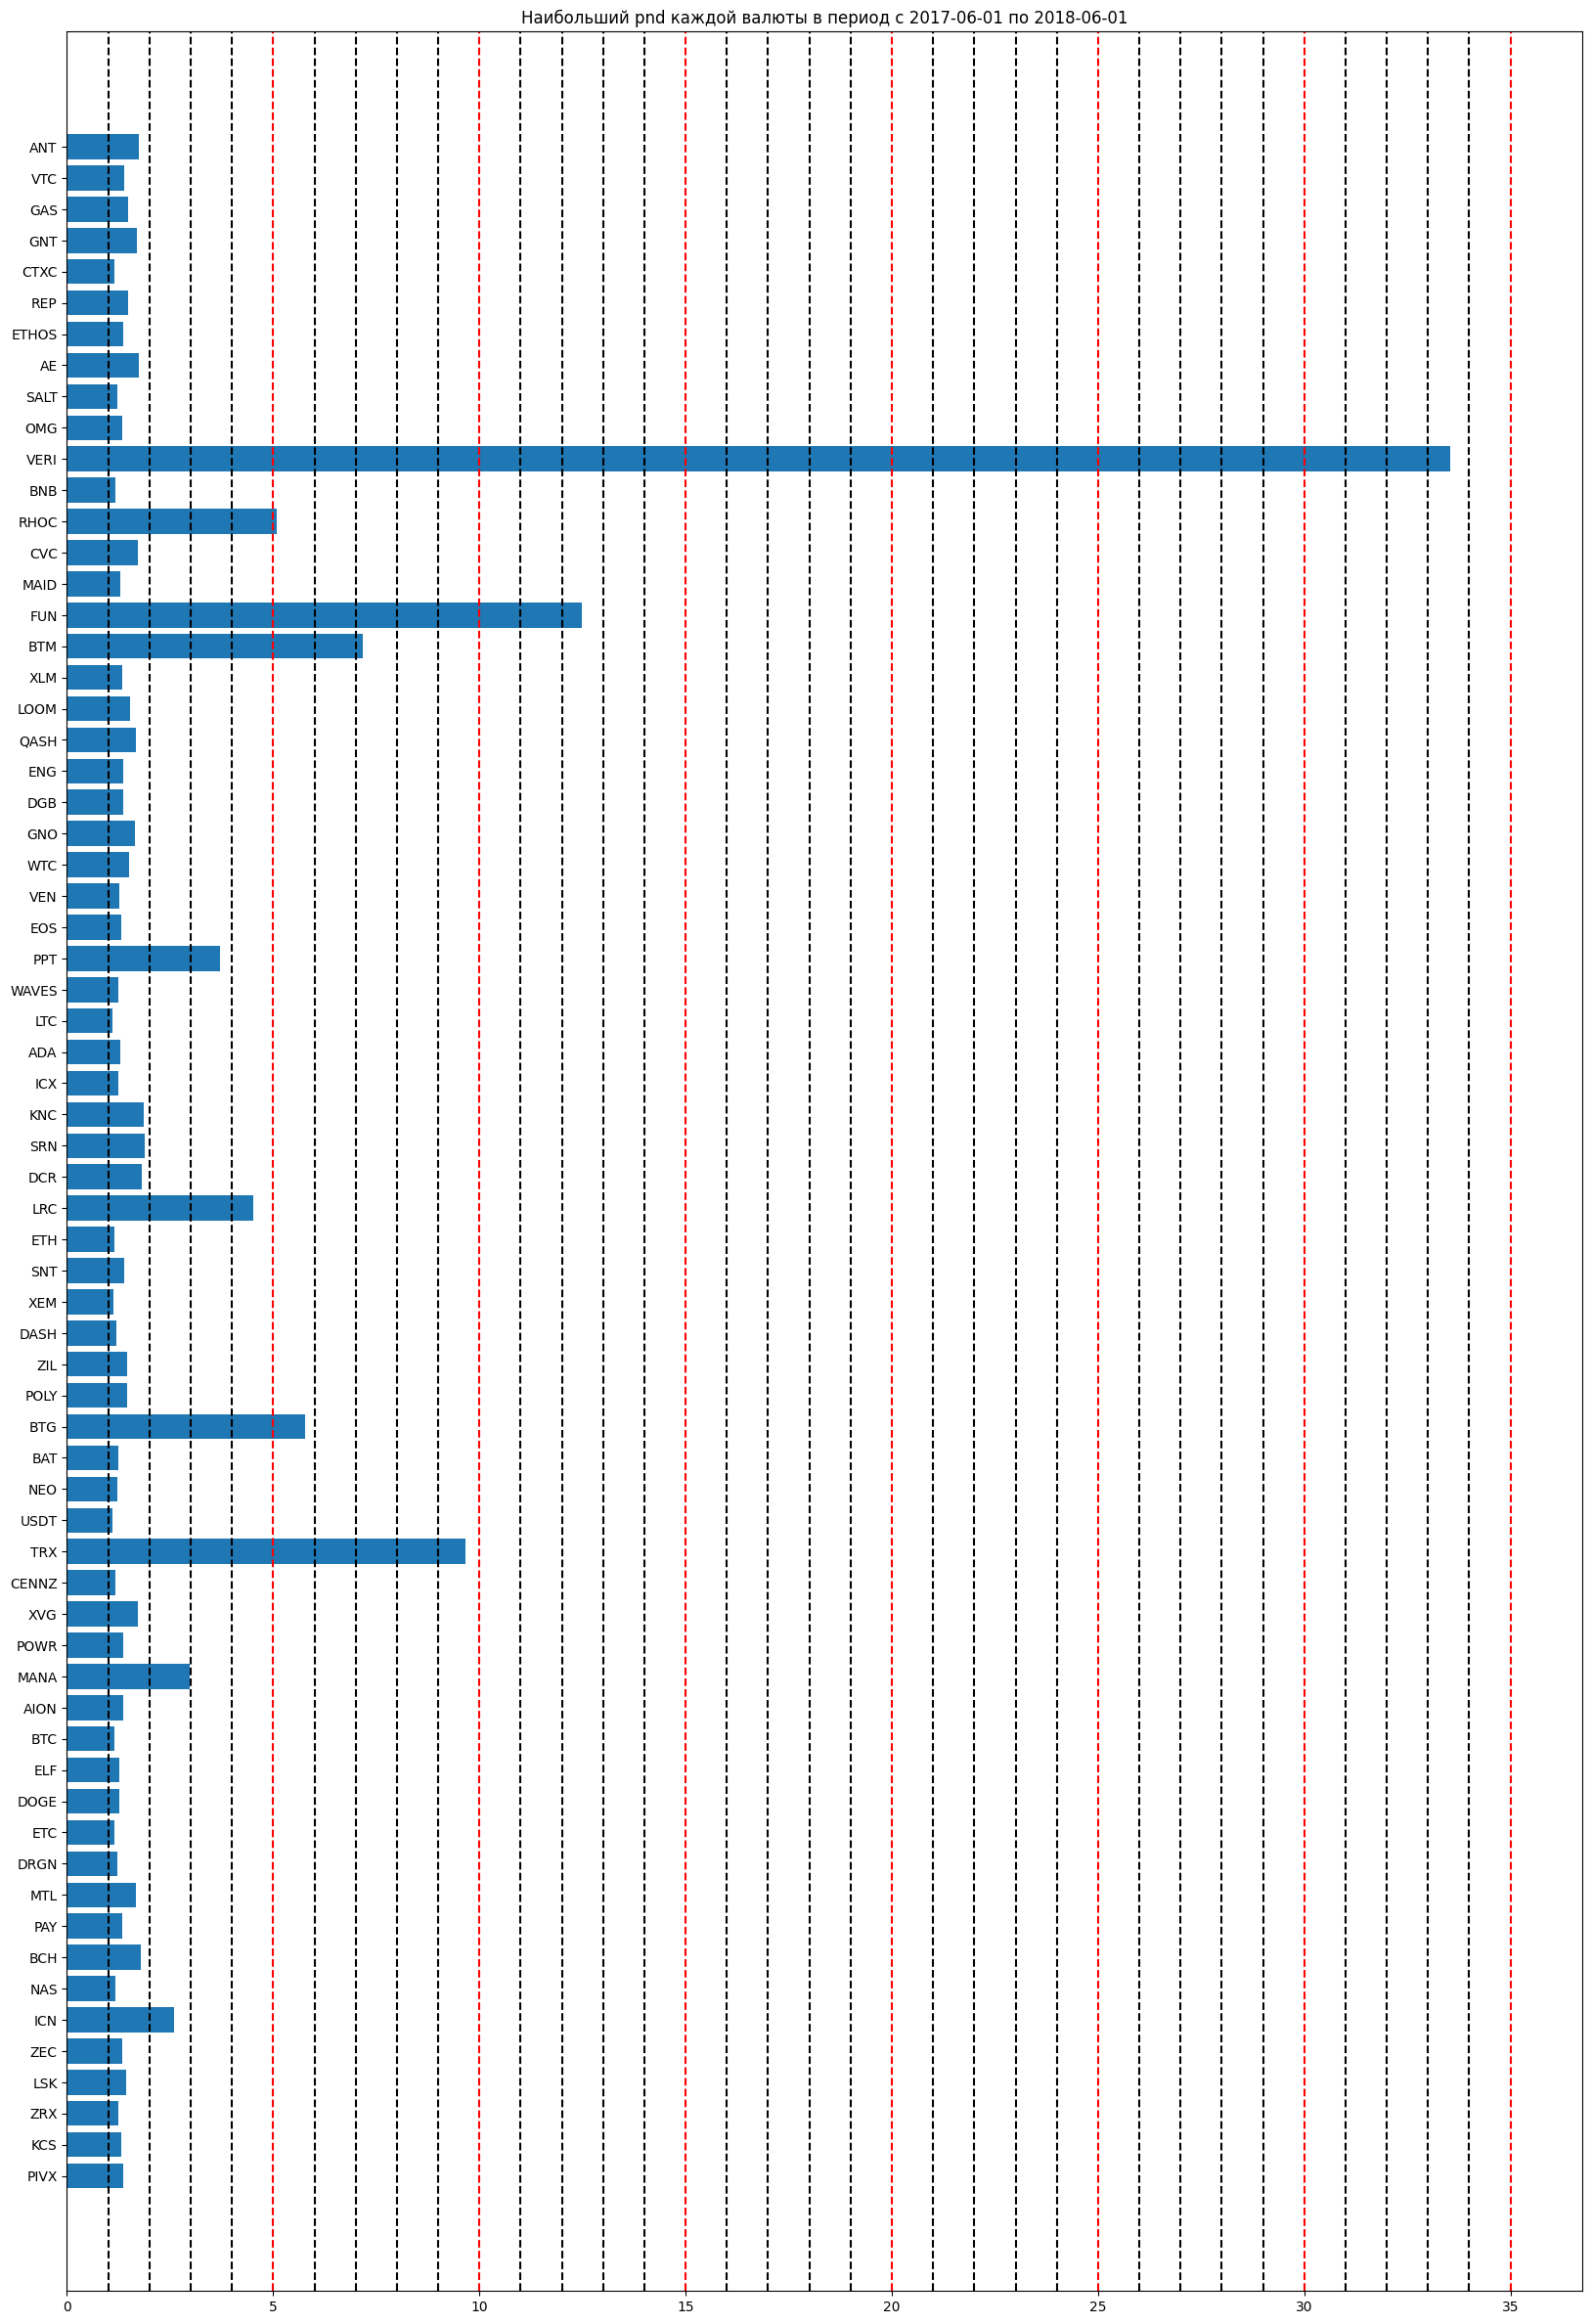

In [16]:
def max_pnd(coins, symbol, start_date, end_date):
    needed_lines = coins.loc[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    pnd = list(needed_lines['high'] / (needed_lines['open'] + (needed_lines['open'] < needed_lines['close']) *
                                       (needed_lines['close'] - needed_lines['open'])))
    ind_with_max_pnd = int(pnd.index(max(pnd)))
    return pnd[ind_with_max_pnd]

coins_symbol_list = list(set(coins.symbol))
pnd_values = []

for i in coins_symbol_list:
    pnd_values.append(max_pnd(coins, symbol=i, start_date='2017-06-01', end_date='2018-06-01'))

plt.figure(figsize=(20, 30))
plt.title("Наибольший pnd каждой валюты в период с 2017-06-01 по 2018-06-01")
for i in range(0, 36):
    if i % 5 == 0:
        plt.axvline(x=i, linestyle='--', color='r')
        continue
    plt.axvline(x=i, linestyle='--', color='k')
plt.barh(coins_symbol_list, pnd_values)
plt.show()

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [17]:
def compute_roi(coins, investments, start_date, end_date):
    start_money_list = []
    end_money_list = []
    for i in investments.keys():
        start_money_list.append(coins[(coins['symbol'] == i) & (coins['date'] == start_date)]['price'].item() *
                                investments[i])
    for i in investments.keys():
        end_money_list.append(coins[(coins['symbol'] == i) & (coins['date'] == end_date)]['price'].item() *
                              investments[i])
    value = sum([end_money_list[i] - start_money_list[i] for i in range(len(end_money_list))])
    if value > 0:
        print("Стало на", value, "USD больше")
    else:
        print("Стало на", abs(value), "USD меньше")

In [18]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

Стало на 36350.0 USD больше


In [19]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

Стало на 7555595.0 USD больше


## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [20]:
import datetime
def plot_bollinger_bands(coins, symbol, window, width):
    needed_lines = coins[coins['symbol'] == symbol]
    ml = needed_lines['price'].rolling(window=window).agg(lambda series: np.average(series))
    StdDev = needed_lines['price'].rolling(window=window).\
        agg(lambda series: np.sqrt(np.average(sum(((np.average(series) - series.iloc[i].item()) ** 2) for i in range(0, window)) / window)))
    date_list = []
    for i in needed_lines['date']:
        date_list.append(datetime.date(int(i[0:4]), int(i[5:7]), int(i[8:])))
    mpl.rcParams.update({'font.size': 20})
    plt.figure(figsize=(40, 10))
    plt.plot(date_list, ml, color='gold', label='Rolling price')
    plt.plot(date_list, ml+width*StdDev, color='maroon', label='Bollinger upper bound')
    plt.plot(date_list, ml-width*StdDev, color='r', label='Bollinger lower bound')
    plt.plot(date_list, needed_lines['price'], color='g', label='Price')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend(
        loc='upper left',
        borderaxespad=5
    )
    plt.grid(True)
    plt.show()

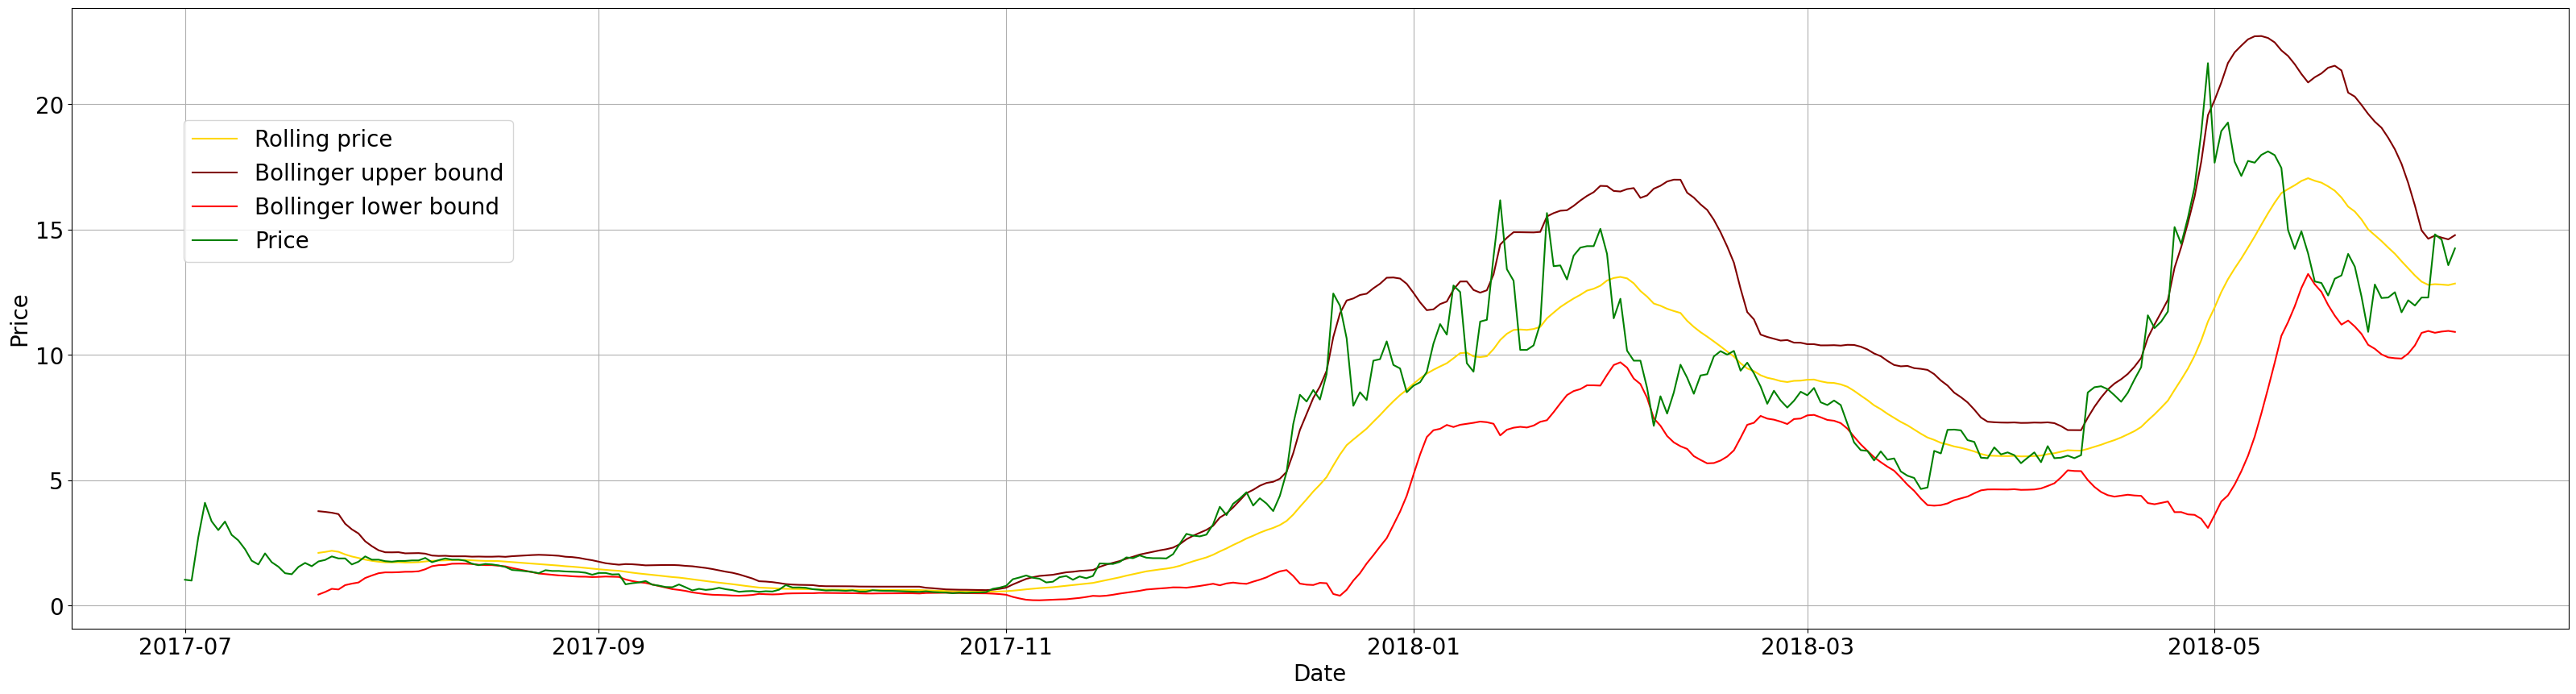

In [21]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Cкорее да, чем нет, методом пристального взгляда можем утверждать, что более 90% длины кривой цены лежит в гранциах Боллинджера**

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

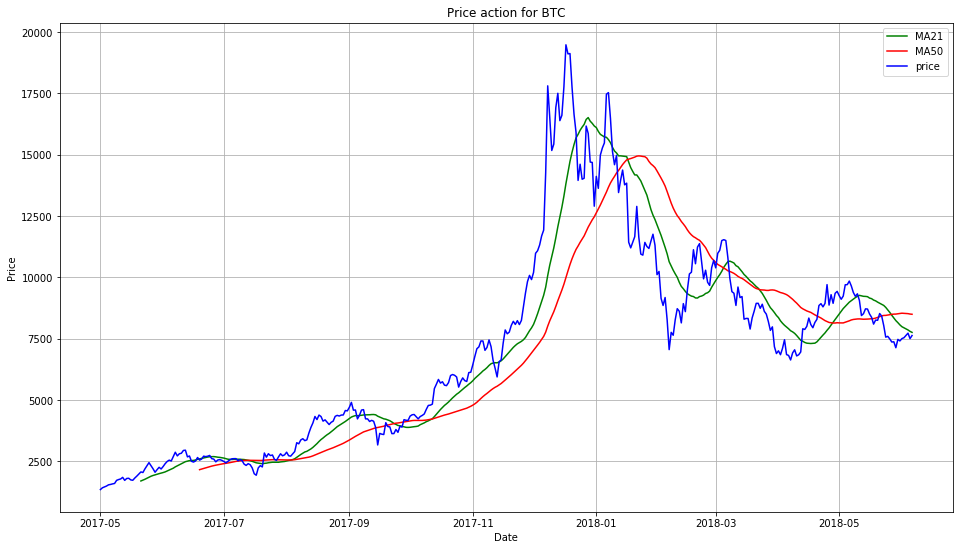

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.